In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Directory paths
train_dir = 'C:/Users/asus/Downloads/waste_classification/DATASET/DATASET/TRAIN'
test_dir = 'C:/Users/asus/Downloads/waste_classification/DATASET/DATASET/TEST'

# Data augmentation for image preprocessing
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
train_generator = datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='binary', subset='training')
validation_generator = datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='binary', subset='validation')


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [2]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [3]:
# Train the CNN
history = cnn_model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
565/565 [==============================] - 338s 596ms/step - loss: 0.4326 - accuracy: 0.8153 - val_loss: 0.4140 - val_accuracy: 0.7983
Epoch 2/5
565/565 [==============================] - 195s 344ms/step - loss: 0.3673 - accuracy: 0.8472 - val_loss: 0.3762 - val_accuracy: 0.8231
Epoch 3/5
565/565 [==============================] - 187s 330ms/step - loss: 0.3426 - accuracy: 0.8585 - val_loss: 0.3831 - val_accuracy: 0.8402
Epoch 4/5
565/565 [==============================] - 187s 332ms/step - loss: 0.3240 - accuracy: 0.8663 - val_loss: 0.3412 - val_accuracy: 0.8568
Epoch 5/5
565/565 [==============================] - 188s 333ms/step - loss: 0.3029 - accuracy: 0.8759 - val_loss: 0.3757 - val_accuracy: 0.8400


In [4]:
test_generator = datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_generator)
print(f"CNN Model - Accuracy: {cnn_accuracy * 100:.2f}%")


Found 2513 images belonging to 2 classes.
79/79 [==============================] - 23s 298ms/step - loss: 0.2713 - accuracy: 0.8934
CNN Model - Accuracy: 89.34%


1/1 [==============================] - 0s 114ms/step
The waste item is classified as: Organic


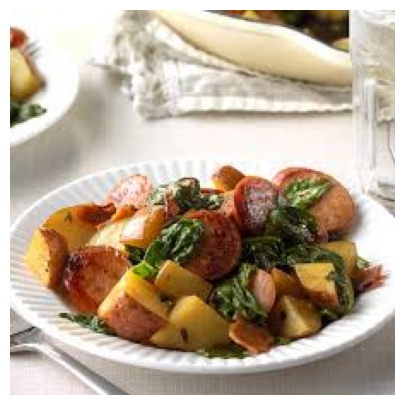

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the test image (replace with the actual image path)
test_image_path = 'C:/Users/asus/Downloads/waste_classification/DATASET/DATASET/TEST/O/O_13015.jpg'
test_img = cv2.imread(test_image_path)

# Convert BGR (OpenCV format) to RGB for proper display with matplotlib
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Preprocess the image (resize and normalize)
preprocessed_image = preprocess_image(test_image_path)

# Perform the prediction
prediction = cnn_model.predict(preprocessed_image)

# Interpret the result
if prediction[0][0] > 0.5:
    print("The waste item is classified as: Recyclable")
else:
    print("The waste item is classified as: Organic")

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(test_img_rgb)
plt.axis('off')  # Hide axes
plt.show()


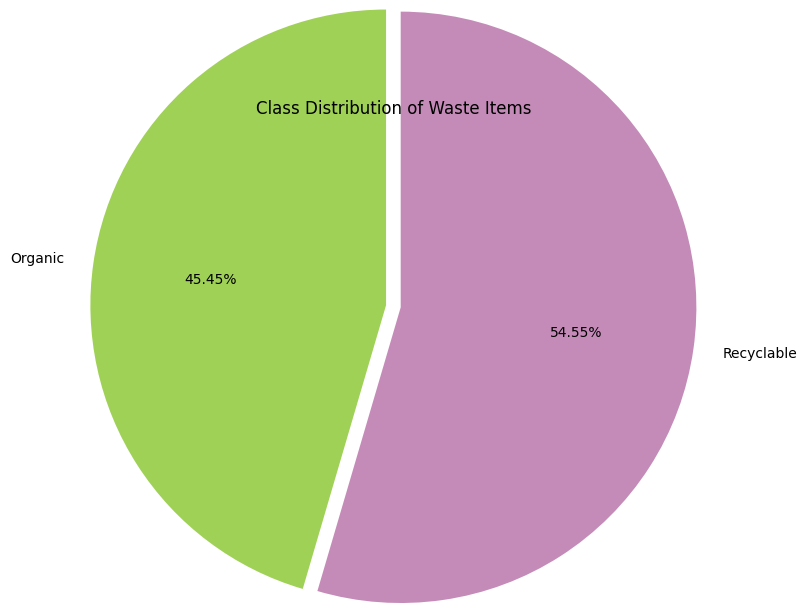

In [7]:
import matplotlib.pyplot as plt

# Example of your data label counts (from training or testing dataset)
# Since the code provided doesn't give explicit data for labels, we assume `data` is your dataframe with labels.
# Replace the below line with actual data if available
# data = pd.read_csv('path_to_your_data')  # Uncomment if you need to load your dataset

# You can get the label counts like this:
# label_counts = data['label'].value_counts()

# Example label counts (replace with actual values from your dataset)
label_counts = [1000, 1200]  # Replace with actual counts of 'Organic' and 'Recyclable' labels

# Colors for the pie chart
colors = ['#a0d157', '#c48bb8']  # Organic and Recyclable colors

# Labels for the classes
labels = ['Organic', 'Recyclable']

# Plotting the pie chart
plt.pie(label_counts, 
        startangle=90, 
        explode=[0.05, 0.05],  # Slightly explode the slices for emphasis
        autopct='%0.2f%%',  # Percentage format
        labels=labels, 
        colors=colors, 
        radius=2)

# Display the plot
plt.title("Class Distribution of Waste Items")
plt.show()


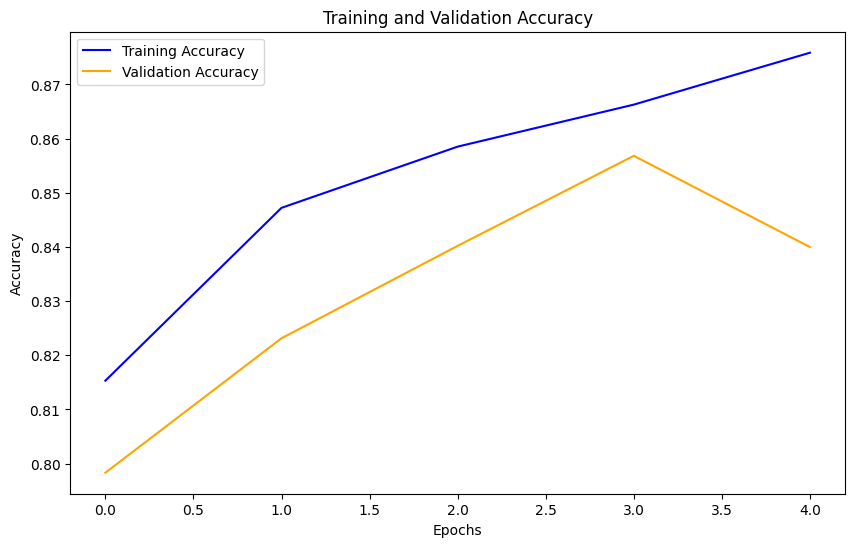

In [8]:
import matplotlib.pyplot as plt

# Ensure you're using the correct variable for the history object
# If your training history variable is named 'history', this will work

plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label="Training Accuracy", color='blue')
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color='orange')

# Adding labels and title
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


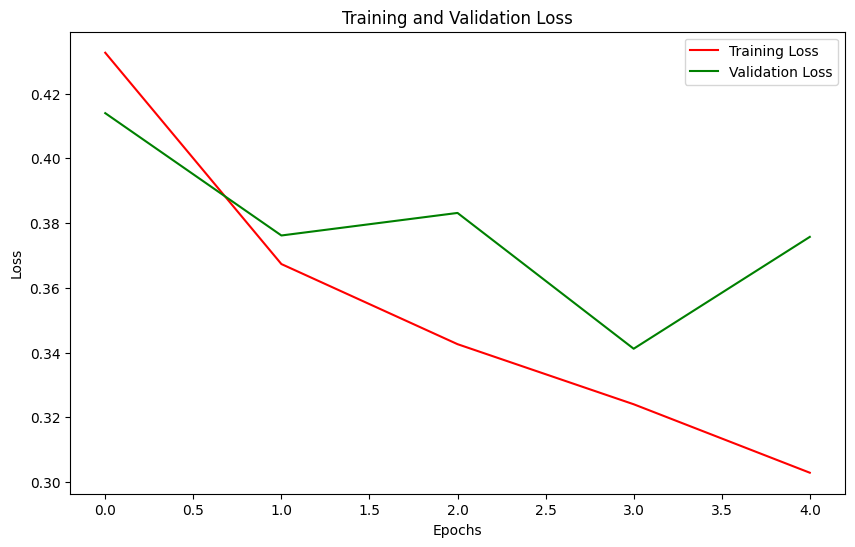

In [9]:
import matplotlib.pyplot as plt

# Plotting the loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label="Training Loss", color='red')
plt.plot(history.history['val_loss'], label="Validation Loss", color='green')

# Adding labels and title
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Displaying the legend
plt.legend()

# Show the plot
plt.show()
